In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('household_power_consumption.txt',sep=';')

<ipython-input-2-2b96e75ceedb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',sep=';')


In [3]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

<ipython-input-3-93e83f2bc647>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [4]:
df = df.drop(columns=['Date', 'Time'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    object        
 1   Global_reactive_power  object        
 2   Voltage                object        
 3   Global_intensity       object        
 4   Sub_metering_1         object        
 5   Sub_metering_2         object        
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


In [6]:
#convert other columns to numeric 
columns_to_convert = ['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for x in columns_to_convert:
    df[x]=pd.to_numeric(df[x],errors='coerce')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [8]:
#check null values in each column
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64

In [9]:
# impute null values with forward method
df_filled = df.fillna(method= 'ffill' )
# recheck null values in each column
df_filled.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
datetime                 0
dtype: int64

In [10]:
# reset index with 'Date' column
df_filled_reset = df_filled.set_index( "datetime" , inplace= False )

In [11]:
df_filled_reset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
# resample to hour data point with sum
df_filled_reset_hr = df_filled_reset.resample( 'H' ).sum()  

In [13]:
df_filled_reset_hr.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,152.024,8.244,8447.18,651.6,0.0,19.0,607.0
2006-12-16 18:00:00,217.932,4.802,14074.81,936.0,0.0,403.0,1012.0
2006-12-16 19:00:00,204.014,5.114,13993.95,870.2,0.0,86.0,1001.0
2006-12-16 20:00:00,196.114,4.506,14044.29,835.0,0.0,0.0,1007.0
2006-12-16 21:00:00,183.388,4.600,14229.52,782.8,0.0,25.0,1033.0


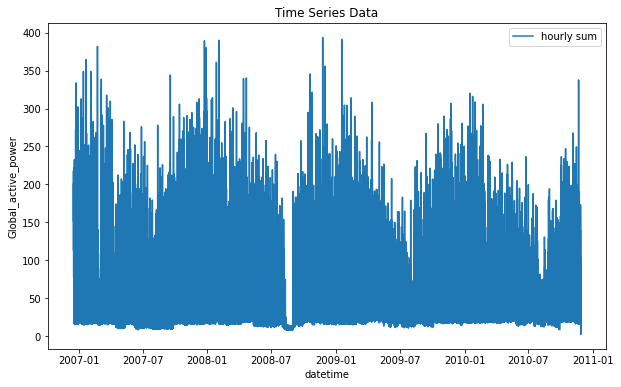

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(df_filled_reset_hr.index,df_filled_reset_hr['Global_active_power'], label='hourly sum')
plt.title('Time Series Data')
plt.xlabel('datetime')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

#Firstly, forward-fill all the missing values.Resample the data from a minute sampling rate to an hourly sampling rate (i.e sum over the minutes for each hour). Which of the following is a plot of the hourly global_active_power over time?
# answer: C

In [15]:
correlation = df_filled['Global_active_power'].corr(df_filled['Voltage'])

# Print the correlation coefficient rounded to 3 decimal places
print(f"Pearson correlation coefficient between Global_active_power and Voltage: {correlation:.3f}")

Pearson correlation coefficient between Global_active_power and Voltage: -0.396


In [16]:
correlation = df_filled['Voltage'].corr(df_filled['Global_intensity'])

# Print the correlation coefficient rounded to 2 decimal places
print(f"Pearson correlation coefficient between Global_intensity and Voltage: {correlation:.2f}")

Pearson correlation coefficient between Global_intensity and Voltage: -0.41


In [17]:
# resample to daily data point with sum
df_filled_reset_daily= df_filled_reset.resample( 'D' ).sum() 

In [18]:
# reset index
df_daily = df_filled_reset_daily.reset_index(drop=False)


In [19]:

# Rename the time and target columns to 'ds' and 'y' as required by Prophet
df_daily = df_daily.rename(columns={'datetime': 'ds', 'Global_active_power': 'y'})

In [20]:
# divide the data into a train and test set. The last 300 days is the test set 
test_set=df_daily.iloc[-300:]
train_set=df_daily.iloc[:-300]

In [21]:
# Train the Prophet model
from prophet import Prophet
model = Prophet()
model.fit(train_set)

00:35:27 - cmdstanpy - INFO - Chain [1] start processing
00:35:27 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Make future DataFrame for predictions (for the same length as the test set)
future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)

In [23]:
predicted_test_set = forecast[['ds', 'yhat']].iloc[-300:]

In [24]:
comparison_df = test_set.merge(predicted_test_set, on='ds', how='left')
# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Extract actual and predicted values
actual_values = comparison_df['y']
predicted_values = comparison_df['yhat']

# Calculate MAPE
mape = calculate_mape(actual_values, predicted_values)

# Print MAPE rounded to 2 decimal places
print(f"MAPE: {mape:.2f}%")

MAPE: 27.19%


In [25]:
# Calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Extract actual and predicted values
actual_values = comparison_df['y']
predicted_values = comparison_df['yhat']

# Calculate RMSE
rmse = calculate_rmse(actual_values, predicted_values)

# Print RMSE rounded to 2 decimal places
print(f"RMSE: {rmse:.2f}")

RMSE: 401.88


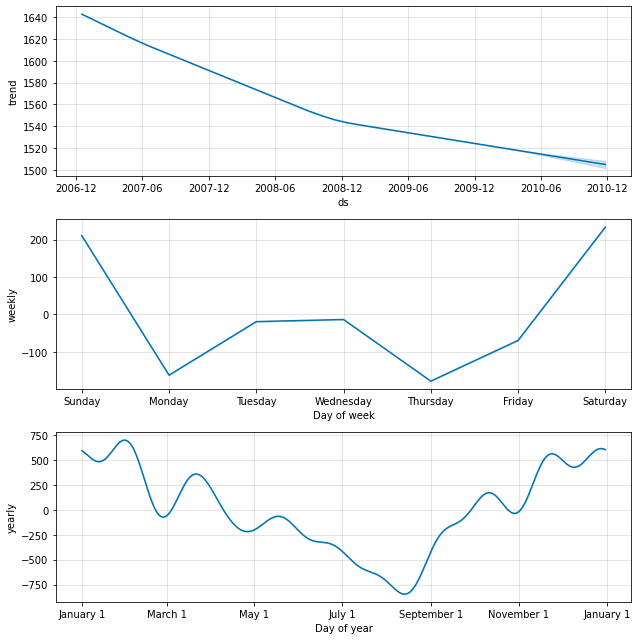

In [26]:
fig = model.plot_components(forecast)
# the lowest value in weekly seasonality is Thursday

In [27]:
# Renaming the columns
df_daily_2 = df_daily.rename(columns={
    'Global_reactive_power': 'add1',
    'Voltage': 'add2',
    'Global_intensity': 'add3',
    'Sub_metering_1': 'add4',
    'Sub_metering_2': 'add5',
    'Sub_metering_3': 'add6'
})

In [28]:
test_set_2 = df_daily_2.iloc[-300:]
train_set_2 = df_daily_2.iloc[:-300]

In [29]:
model = Prophet()
# Add the additional regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [30]:
model.fit(train_set_2)
future_2 = model.make_future_dataframe(periods=300)
# Add the regressors to the future DataFrame
future_2 = future_2.merge(df_daily_2[['ds', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']], on='ds', how='left')


00:35:29 - cmdstanpy - INFO - Chain [1] start processing
00:35:30 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
forecast_2 = model.predict(future_2)

In [32]:
predicted_test_set_2 = forecast_2[['ds', 'yhat']].iloc[-300:]
comparison_df = test_set_2[['ds', 'y']].merge(predicted_test_set_2, on='ds', how='left')

In [33]:
# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Extract actual and predicted values
actual_values = comparison_df['y']
predicted_values = comparison_df['yhat']

# Calculate MAPE
mape = calculate_mape(actual_values, predicted_values)

# Print MAPE rounded to 2 decimal places
print(f"MAPE: {mape:.2f}%")

MAPE: 2.38%


In [34]:
# Calculate RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Extract actual and predicted values
actual_values = comparison_df['y']
predicted_values = comparison_df['yhat']

# Calculate RMSE
rmse = calculate_rmse(actual_values, predicted_values)

# Print RMSE rounded to 2 decimal places
print(f"RMSE: {rmse:.2f}")

RMSE: 32.57


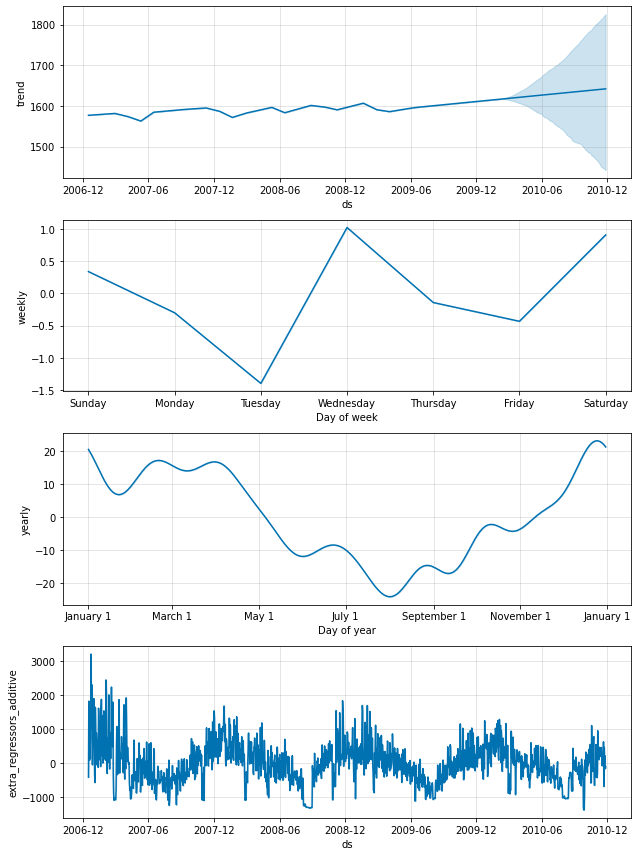

In [35]:
fig = model.plot_components(forecast_2)
# the lowest value in weekly seasonality is Tuesday
# the lowest value in yearly seasonality is August